In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import and_, or_, not_

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Code

In [10]:
# sel = [func.min(Measurement.tobs), 
#     func.avg(Measurement.tobs),
#     func.max(Measurement.tobs)]

# start = '2010-04-01'
# end = '2010-04-03'

# fromDate = datetime.strptime(start, '%Y-%m-%d')
# toDate = datetime.strptime(end, '%Y-%m-%d')

# session = Session(engine)

In [11]:
# results = session.query(*sel).\
#         filter(Measurement.date <= toDate).all()
# session.close()

# results

In [12]:
# results = session.query(*sel).\
#         filter(Measurement.date >= toDate).all()
# session.close()
# results

In [13]:
# results = session.query(*sel).\
#         filter(Measurement.date>=fromDate).filter(Measurement.date <= toDate).all()
# session.close()
# results

In [24]:
###Delete This Cell
#debug code
inspector = inspect(engine)

# inspector.get_table_names()

print ("---measurement---")
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
print ("---station---")
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

# session.query(func.count(Measurement.date)).all()
# session.query(func.count(Station.date)).all()

# session.query(Measurement.id, Measurement.station , Measurement.date, Measurement.prcp, Measurement.tobs ).\
#     order_by(Measurement.date.desc()).all()

---measurement---
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
---station---
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [46]:
sel = [Measurement.date, func.sum(Measurement.prcp)]

session = Session(engine)
results = session.query(*sel).group_by(Measurement.date).all()
results

[('2010-01-01', 1.06),
 ('2010-01-02', 0.02),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.01),
 ('2010-01-05', 0.03),
 ('2010-01-06', 0.5800000000000001),
 ('2010-01-07', 1.65),
 ('2010-01-08', 0.06),
 ('2010-01-09', 0.02),
 ('2010-01-10', 0.02),
 ('2010-01-11', 0.8800000000000001),
 ('2010-01-12', 0.02),
 ('2010-01-13', 0.02),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.01),
 ('2010-01-21', 0.65),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.02),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.25),
 ('2010-01-27', 1.6),
 ('2010-01-28', 0.73),
 ('2010-01-29', 2.19),
 ('2010-01-30', 7.3500000000000005),
 ('2010-01-31', 2.16),
 ('2010-02-01', 0.05),
 ('2010-02-02', 0.05),
 ('2010-02-03', 3.21),
 ('2010-02-04', 0.02),
 ('2010-02-05', 0.16),
 ('2010-02-06', 0.12),
 ('2010-02-07', 0.01),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-10', 0.0),
 ('2010-02-11', 0.0),
 ('2010

In [55]:
start = '2017-08-08'

sel = [Measurement.date, 
       func.min(Measurement.tobs), 
    func.avg(Measurement.tobs),
    func.max(Measurement.tobs)]

fromDate = datetime.strptime(start, '%Y-%m-%d')

session = Session(engine)
results = session.query(*sel).filter(Measurement.date >= fromDate).group_by(Measurement.date).all()
session.close()

all_dates = []
for date, min, avg, max in results:
    temp_dict = {}
    temp_dict["date"] = date
    temp_dict["min"] = min
    temp_dict["avg"] = avg
    temp_dict["max"] = max
    all_dates.append(temp_dict)
all_dates

[{'date': '2017-08-09', 'min': 71.0, 'avg': 77.33333333333333, 'max': 81.0},
 {'date': '2017-08-10', 'min': 75.0, 'avg': 79.25, 'max': 81.0},
 {'date': '2017-08-11', 'min': 72.0, 'avg': 78.0, 'max': 81.0},
 {'date': '2017-08-12', 'min': 74.0, 'avg': 79.0, 'max': 83.0},
 {'date': '2017-08-13', 'min': 77.0, 'avg': 80.6, 'max': 84.0},
 {'date': '2017-08-14', 'min': 75.0, 'avg': 78.2, 'max': 81.0},
 {'date': '2017-08-15', 'min': 70.0, 'avg': 77.2, 'max': 82.0},
 {'date': '2017-08-16', 'min': 71.0, 'avg': 77.0, 'max': 82.0},
 {'date': '2017-08-17', 'min': 72.0, 'avg': 77.25, 'max': 83.0},
 {'date': '2017-08-18', 'min': 76.0, 'avg': 78.0, 'max': 80.0},
 {'date': '2017-08-19', 'min': 71.0, 'avg': 78.75, 'max': 85.0},
 {'date': '2017-08-20', 'min': 78.0, 'avg': 79.66666666666667, 'max': 81.0},
 {'date': '2017-08-21', 'min': 76.0, 'avg': 79.5, 'max': 82.0},
 {'date': '2017-08-22', 'min': 76.0, 'avg': 80.0, 'max': 82.0},
 {'date': '2017-08-23', 'min': 76.0, 'avg': 80.25, 'max': 82.0}]

In [65]:
end = '2017-08-08'
start = '2017-08-10'

if start>end:
    print ("Start date cannot be later than end date. Please revise your query.")

else:
    sel = [Measurement.date, 
        func.min(Measurement.tobs), 
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs)]

    fromDate = datetime.strptime(start, '%Y-%m-%d')
    toDate = datetime.strptime(end, '%Y-%m-%d')

    session = Session(engine)
    results = session.query(*sel).filter(Measurement.date >= fromDate).filter(Measurement.date <= toDate).group_by(Measurement.date).all()
    session.close()

    all_dates = []
    for date, min, avg, max in results:
        temp_dict = {}
        temp_dict["date"] = date
        temp_dict["min"] = min
        temp_dict["avg"] = avg
        temp_dict["max"] = max
        all_dates.append(temp_dict)

    print(all_dates)

Start date cannot be later than end date. Please revise your query.


In [86]:
session = Session(engine)
last_date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = datetime.strptime(last_date_query[0], '%Y-%m-%d')
first_date_query = session.query(Measurement.date).order_by(Measurement.date).first()
first_date = datetime.strptime(first_date_query[0], '%Y-%m-%d')
session.close()
first_date

start = '2017-08-08'
end = '2019-08-10'

query_date1 = datetime.strptime(start, '%Y-%m-%d')
query_date2 = datetime.strptime(end, '%Y-%m-%d')

# if first_date< query_date1 < last_date :
#     print("query_date is between first and last date.")
# else:
#     print("query_date is NOT between first and last date.")
#     print(f"data begins {first_date:%Y-%m-%d}")
#     print(f"data ends {last_date:%Y-%m-%d}")
    
if first_date< query_date1 < query_date2 < last_date :
    print("query_date is between first and last date.")
else:
    print("Error: Please check your query to make sure the start date is after end date.")
    print("Error: Please make sure your query dates are within database date range.")
    print(f"data begins {first_date:%Y-%m-%d}")
    print(f"data ends {last_date:%Y-%m-%d}")

query_date is NOT between first and last date.
data begins 2010-01-01
data ends 2017-08-23


In [89]:
start = '2017-04-08'
fromDate = datetime.strptime(start, '%Y-%m-%d')
fromDate = fromDate - timedelta(days=1)
fromDate

datetime.datetime(2017, 4, 7, 0, 0)

# Exploratory Climate Analysis

In [111]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
## query the date of last data point
last_date_query = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
## transform date into datetime
last_date = datetime.strptime(last_date_query[0], '%Y-%m-%d')

# calculate query date
## get to the last year
query_date = datetime(last_date.year - 1, last_date.month, last_date.day)
## to include the end points, use "day-1"
query_date = query_date - timedelta(days=1)

# Perform a query to retrieve the data and precipitation scores
last_12months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(last_12months, columns=['date', 'prcp']).set_index('date')
df_prcp = df_prcp.sort_values('date')

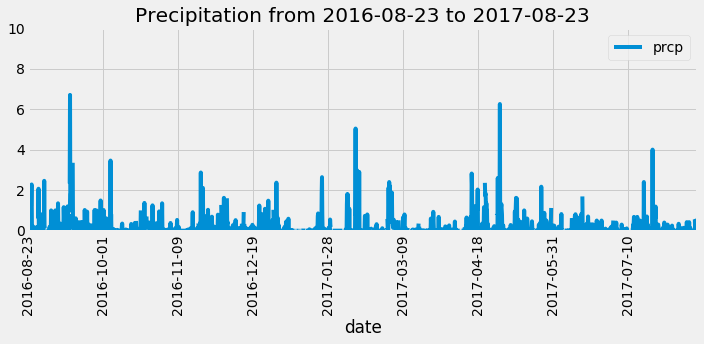

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
## inserted benchmark dates to get a sense of when the observation took place.
df_prcp.plot(figsize = (10,5), title = "Precipitation from 2016-08-23 to 2017-08-23", grid = True)
plt.xticks (rotation=90)
plt.ylim (0, 10)
plt.tight_layout()
plt.savefig("Outputs/Precipitation.png")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [17]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Station.station).count()
number_of_stations

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station = station_activity[0][0]
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

m_active_stats = session.query(*sel).\
    filter(Measurement.station == most_active_station).all()

m_active_stats

[(54.0, 85.0, 71.66378066378067)]

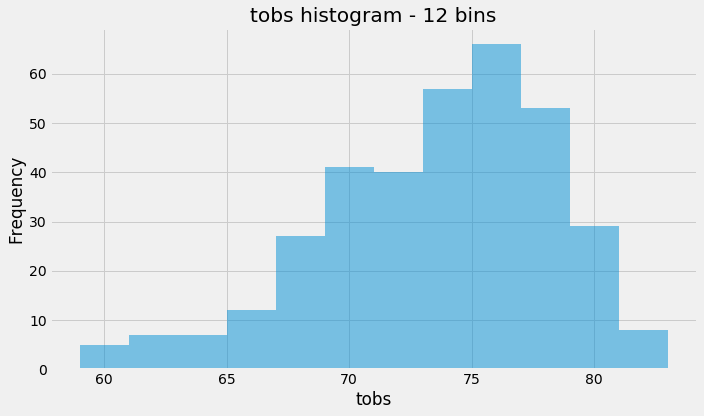

In [138]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
activestation_12months = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > query_date).\
    filter(Measurement.station == most_active_station).all()

df_station = pd.DataFrame(activestation_12months, columns=['station', 'date', 'tobs'])

plt.figure(figsize = (10,6))
plt.title("tobs histogram - 12 bins")
plt.xlabel('tobs')
df_station["tobs"].plot.hist(bins = 12, alpha = 0.5)
plt.tight_layout()
plt.savefig("Outputs/Tobs Histogram.png")
plt.show()

## Optional Challenge Assignment

### Temperature Analysis I

In [21]:
# * Hawaii is reputed to enjoy mild weather all year. 
# Is there a meaningful difference between the temperature in, for example, June and December?
# * Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.

#Query June and December Temperature
session = Session(engine)
sel = [Measurement.date, func.avg(Measurement.tobs)]
avg_june_temps = session.query(*sel).filter(func.strftime("%m", Measurement.date) == '06').group_by(Measurement.date).all()
avg_dec_temps = session.query(*sel).filter(func.strftime("%m", Measurement.date) == '12').group_by(Measurement.date).all()
session.close()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_june_temp = pd.DataFrame(avg_june_temps, columns=['date', 'avg_temp'])
df_dec_temp = pd.DataFrame(avg_dec_temps, columns=['date', 'avg_temp'])
df_june_temp = df_june_temp.sort_values('date')
df_dec_temp = df_dec_temp.sort_values('date')

#save the day of month
df_june_temp["dayofmonth_injune"] = df_june_temp["date"].agg(lambda x: x.split("-")[2])
df_dec_temp["dayofmonth_indec"] = df_dec_temp["date"].agg(lambda x: x.split("-")[2])

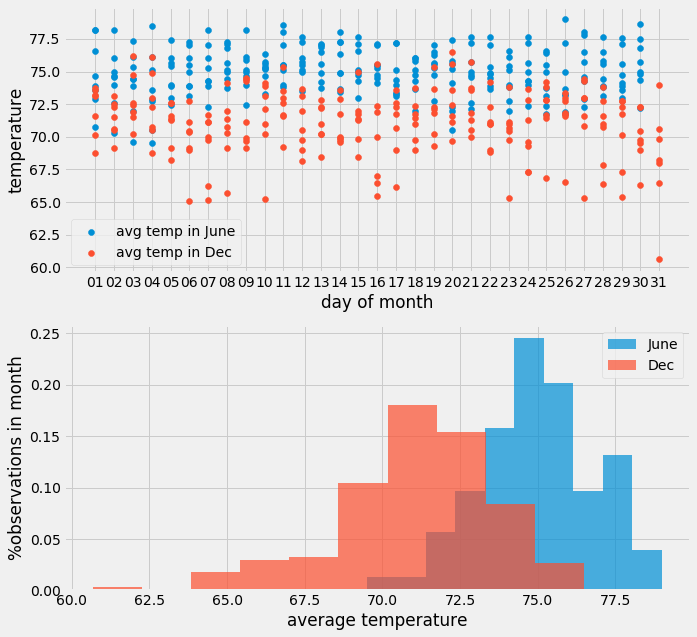

In [53]:
# Scatter Plot of Data
plt.figure(figsize = (10,10))
plt.subplot(2, 1, 1)
plt.scatter(df_june_temp["dayofmonth_injune"], df_june_temp['avg_temp'], label="avg temp in June")
plt.scatter(df_dec_temp["dayofmonth_indec"], df_dec_temp['avg_temp'], label="avg temp in Dec")
plt.xlabel("day of month")
plt.ylabel("temperature")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(df_june_temp["avg_temp"], 10, density=True, alpha=0.7, label="June")
plt.hist(df_dec_temp['avg_temp'], 10, density=True, alpha=0.7, label="Dec")
plt.xlabel("average temperature")
plt.ylabel("%observations in month")
plt.legend() 

plt.savefig("Outputs/June vs Dec")
plt.show()

In [23]:
# * Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Use independent t-test: comparing the means of 2 independent samples - temperature in June vs. Decemeber.
stats.ttest_ind(df_june_temp['avg_temp'], df_dec_temp['avg_temp'], equal_var=False)

#P-value is <= .05 so the temperature differences are statistically significant.
#We cannot reject the null that there is no difference between average temperature between June and December.

Ttest_indResult(statistic=19.02480906571998, pvalue=1.2522889413943713e-57)

### Temperature Analysis II

In [54]:
#Initiate Trip Date:
trip_start = '2018-01-01'
trip_end = '2018-01-10'

#transform to query dates
query_start = datetime.strptime(trip_start, '%Y-%m-%d')
query_start = datetime(query_start.year - 1, query_start.month, query_start.day)
query_end = datetime.strptime(trip_end, '%Y-%m-%d')
query_end = datetime(query_end.year - 1, query_end.month, query_end.day)

(datetime.datetime(2017, 1, 1, 0, 0), datetime.datetime(2017, 1, 10, 0, 0))

In [55]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps(query_start, query_end))

[(60.0, 67.89090909090909, 77.0)]


In [56]:
#my trip dates will be from 2018-01-01 to 201801-10
mycalc_temps = calc_temps(query_start, query_end)
list_results = list(np.ravel(mycalc_temps))

min_temp = list_results[0]
avg_temp = list_results[1]
max_temp = list_results[2]

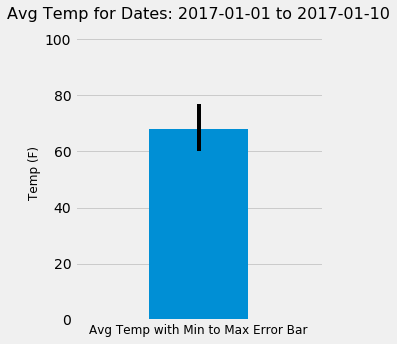

In [140]:
lower_error = avg_temp - min_temp
upper_error = max_temp - avg_temp

asymmetric_error = [lower_error, upper_error]

plt.figure(figsize=(5,5))
plt.bar(1, avg_temp, yerr = [[lower_error], [upper_error]])

plt.xlim(0,2)
plt.xticks ([],[])
plt.ylim(0,105)
plt.title('Avg Temp for Dates: 2017-01-01 to 2017-01-10', fontsize = 16)
plt.xlabel("Avg Temp with Min to Max Error Bar", fontsize = 12)
plt.ylabel('Temp (F)', fontsize = 12)

plt.tight_layout()
plt.savefig("Outputs/Trip Avg Temp.png")
plt.show()

### Temperature Analysis III

In [ ]:
### Daily Rainfall Average
# * Calculate the rainfall per weather station using the previous year's matching dates.

# * Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

# * You are provided with a function called `daily_normals` 
# that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. 
# Be sure to use all historic tobs that match that date string.

# * Create a list of dates for your trip in the format `%m-%d`. 
# Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

# * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

# * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

In [97]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [119]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Use the start and end date to create a range of dates
query_start, query_end

# Stip off the year and save a list of %m-%d strings
mydateswithyear = pd.date_range(query_start, query_end).strftime('%Y-%m-%d').tolist()
mydates = pd.date_range(query_start, query_end).strftime('%m-%d').tolist()

for day in mydates:
    normals.append(daily_normals(day)[0])

# Loop through the list of %m-%d strings and calculate the normals for each date
normals


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0),
 (58.0, 67.9298245614035, 78.0),
 (62.0, 69.74137931034483, 77.0)]

In [125]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_mytrip = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df_mytrip['date'] = mydateswithyear
df_mytrip = df_mytrip.set_index('date')
df_mytrip

,tmin,tavg,tmax
date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0
2017-01-06,61.0,68.964912,76.0
2017-01-07,57.0,68.543860,76.0
2017-01-08,57.0,67.160714,75.0
2017-01-09,58.0,67.929825,78.0


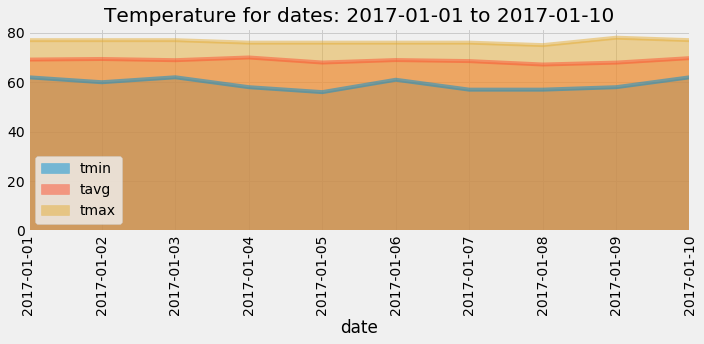

In [139]:
# Plot the daily normals as an area plot with `stacked=False`
df_mytrip.plot.area(figsize = (10,5), title = "Temperature for dates: 2017-01-01 to 2017-01-10", stacked = False, alpha = 0.5)
plt.xticks (rotation=90)
plt.tight_layout()
plt.savefig("Outputs/stacked plot of temperatures.png")
plt.show()

In [146]:
### * Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
query_start, query_end

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

query = session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date >= query_start).\
    filter(Measurement.date <= query_end).group_by(Station.station).order_by(Measurement.prcp).all()

# Perform a query to retrieve the data and precipitation scores
query


[('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.06),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.63),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.16999999999999998)]

[('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.06),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.63),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.16999999999999998)]